In [1]:
import tensorflow as tf

tf.keras.backend.set_floatx('float16')

In [2]:
from tensorflow.keras.datasets import imdb # 영화 리뷰 분류
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
# 리뷰를 텍스트로 디코딩
word_index = imdb.get_word_index() # 단어정보

# 단어 인덱스를 역순으로 변환하여 인덱스에서 단어로 매핑할 수 있는 딕셔너리를 생성
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 

# 첫번째 훈련 데이터의 리뷰 텍스트 디코딩
decode_review = " ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]]) # 인덱스가 3보다 작으면 ?
decode_review

1641221/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [6]:
# 정수 시퀀스를 멀티-핫 인코딩으로 인코딩
import numpy as np
def vectorize_sequences(sequences, dimension=10000): # 데이터를 벡터화
    results = np.zeros((len(sequences), dimension)) # (데이터 샘플 수, 단어 사전 크기) 사이즈의 넘파이 배열 생성
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1. # 해당 위치에 1로 설정
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
# 액션, 코미디, SF, 공포 -> [0, 1, 0, 1, 1, 1, 0, 0, 0 ,0]
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: inf - accuracy: 0.4309 - val_loss: inf - val_accuracy: 0.4431
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: inf - accuracy: 0.4521 - val_loss: inf - val_accuracy: 0.4656
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: inf - accuracy: 0.4763 - val_loss: inf - val_accuracy: 0.4944
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: inf - accuracy: 0.5049 - val_loss: inf - val_accuracy: 0.5244
Epoch 5/20
30/30 [==============================] - 0s 5ms/step - loss: inf - accuracy: 0.5337 - val_loss: inf - val_accuracy: 0.5498
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: inf - accuracy: 0.5640 - val_loss: inf - val_accuracy: 0.5703
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: inf - accuracy: 0.5898 - val_loss: inf - val_accuracy: 0.5898
Epoch 8/20
30/30 [==============================] - 0s 6ms/st

In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

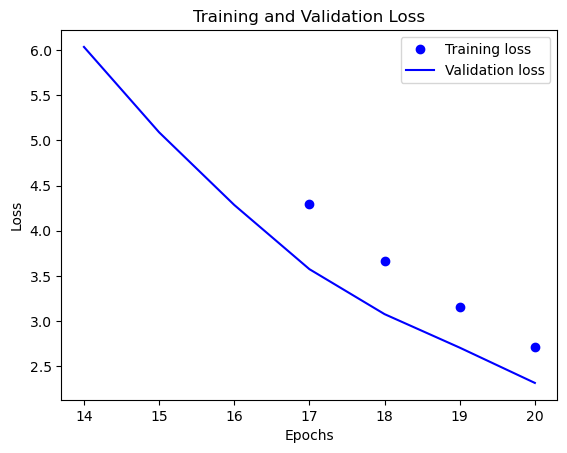

In [14]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

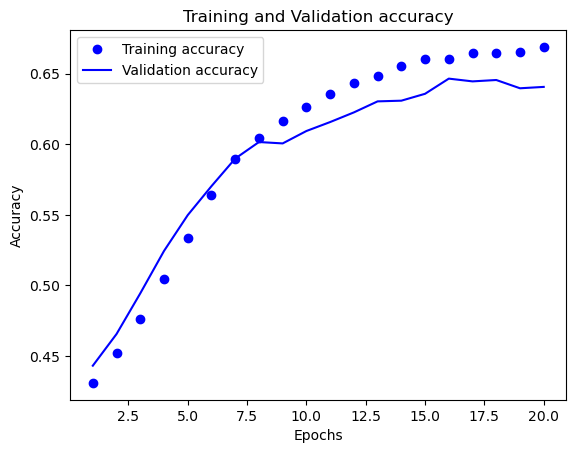

In [15]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
49/49 [==============================] - 0s 4ms/step - loss: 2.1621 - accuracy: 0.6650
Epoch 2/9
49/49 [==============================] - 0s 4ms/step - loss: 1.7236 - accuracy: 0.6631
Epoch 3/9
49/49 [==============================] - 0s 4ms/step - loss: 1.4102 - accuracy: 0.6660
Epoch 4/9
49/49 [==============================] - 0s 3ms/step - loss: 1.1982 - accuracy: 0.6704
Epoch 5/9
49/49 [==============================] - 0s 3ms/step - loss: 1.0752 - accuracy: 0.6660
Epoch 6/9
49/49 [==============================] - 0s 3ms/step - loss: 0.9692 - accuracy: 0.6763
Epoch 7/9
49/49 [==============================] - 0s 3ms/step - loss: 0.8955 - accuracy: 0.6733
Epoch 8/9
49/49 [==============================] - 0s 4ms/step - loss: 0.8315 - accuracy: 0.6729
Epoch 9/9
49/49 [==============================] - 0s 3ms/step - loss: 0.7861 - accuracy: 0.6748


In [17]:
# 테스트 평가
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 0s 517us/step - loss: 0.8413 - accuracy: 0.6577


[0.84130859375, 0.65771484375]

## 새로운 데이터 예측

In [22]:
predictions = model.predict(x_test)

782/782 [==============================] - 0s 418us/step


In [23]:
predictions.shape

(25000, 1)

In [24]:
np.sum(predictions[0])

0.516

In [25]:
np.argmax(predictions[0])

0

In [26]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [27]:
len(train_data)

8982

In [28]:
len(test_data)

2246

In [29]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [30]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [31]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [32]:
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [33]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [37]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.0169 - val_loss: nan - val_accuracy: 0.0060
Epoch 2/20
16/16 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 5/20
16/16 [==============================] - 0s 15ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 6/20
16/16 [==============================] - 0s 9ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: nan - accuracy: 0.0061 - val_loss: nan - val_accuracy: 0.0060
Epoch 8/20
16/16 [==============================] - 0s 9ms

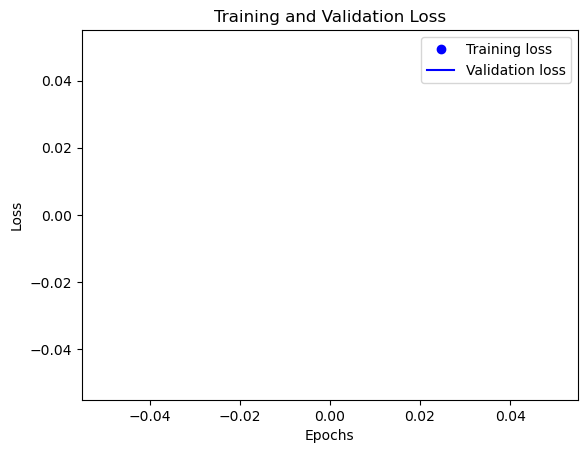

In [38]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

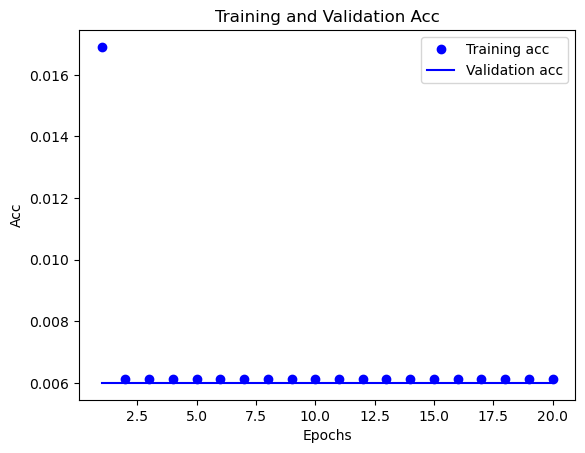

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [40]:
results = model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 667us/step - loss: nan - accuracy: 0.0053


In [41]:
results

[nan, 0.005344390869140625]

In [42]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 587us/step


In [43]:
predictions[0].shape

(46,)

In [44]:
predictions[0]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan], dtype=float16)

In [45]:
np.sum(predictions[0])

nan

In [46]:
np.argmax(predictions[0])

0

In [47]:
model = keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(46, activation='softmax')
])

# hidden layer의 뉴런 수가 충분히 많으면 입력 데이터의 패턴을 좀 더 잘 파악할 수 있다. 또한, 과적합 방지가 가능하다.

In [48]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [49]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [50]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [51]:
# 정규화
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [52]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [53]:
k = 4
num_val_samples = len(train_data) // k # 전체 데이터 셋을 4개의 폴드로 나누어 진행하겠다.
num_epochs = 100
all_scores = []

for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i*num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [54]:
all_scores

[1.916015625, 2.58203125, 2.609375, 2.4375]

In [55]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print(f'#{i}번째 폴드 처리중')
    val_data = train_data[i*num_val_samples : (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples : (i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]], axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size = 16, verbose=0, 
              validation_data=(val_data, val_targets))
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [56]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

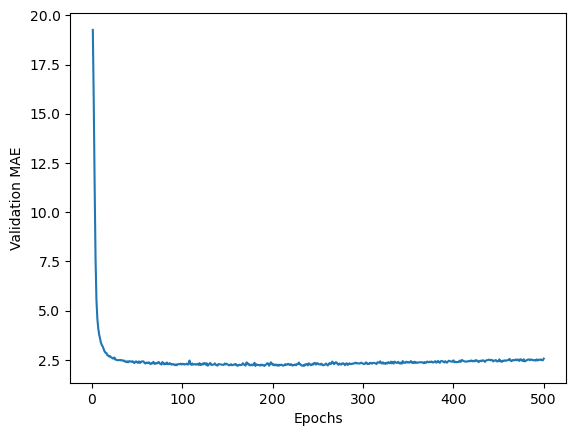

In [57]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

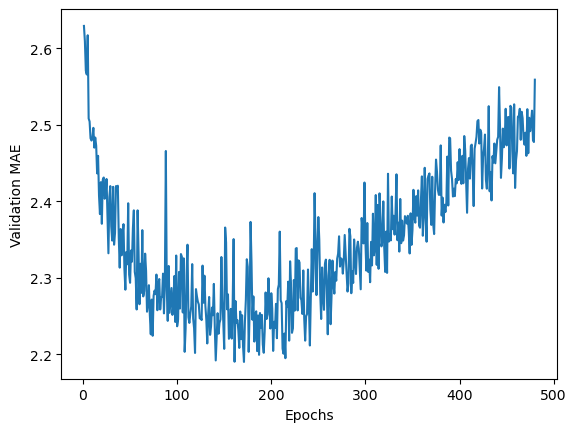

In [58]:
truncated_mae_history = average_mae_history[20:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [59]:
min_val_mae = np.min([np.min(history) for history in all_mae_histories])
min_val_mae

1.728515625

In [60]:
np.argmin(all_mae_histories)

279

In [61]:
model = build_model()
model.fit(train_data, train_targets, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 995us/step - loss: 15.6094 - mae: 2.5488


In [62]:
test_mae_score

2.548828125

In [63]:
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 703us/step


array([8.31], dtype=float16)

In [64]:
test_targets[0]

7.2